In [1]:
import sys
sys.path.append('../src')

from data_manager import read_frame
from hog_features import compute_gradients, compute_histograms, normalize_histograms

import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

from skimage import io, color, feature

data_path = '../data'
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')

H, W, C = 720, 1280, 3
N = 2020

# Original

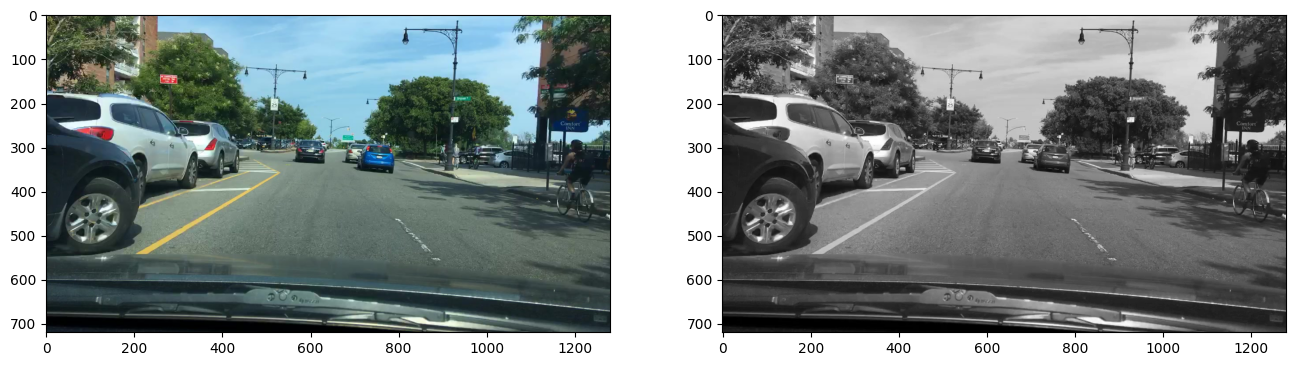

In [2]:
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
frame = read_frame(data_path, train_df, 0)
gray_frame = (color.rgb2gray(frame)*255).astype(np.uint8)

plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)
plt.imshow(frame)

plt.subplot(1, 2, 2)
plt.imshow(gray_frame, cmap='gray')

plt.show()

# Gradients

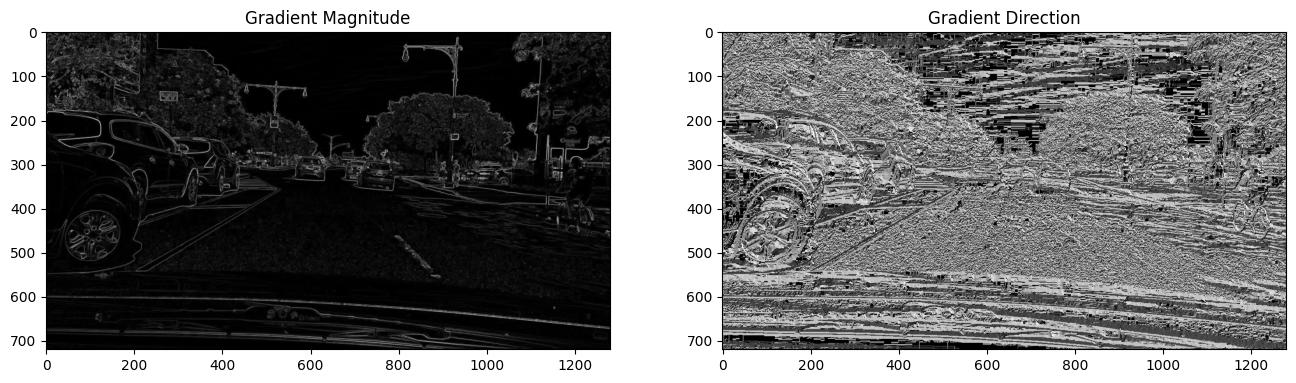

In [3]:
magnitude, direction = compute_gradients(gray_frame)

plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.subplot(1, 2, 2)
plt.imshow(direction, cmap='gray')
plt.title('Gradient Direction')

plt.show()

# Histograms

In [4]:
histograms, cells_x, cells_y  = compute_histograms(
    magnitude, direction, 
    bins=9, cell_size=(8,8)
)
print(f"Horizontal cells: {cells_x}")
print(f"Vertical cells: {cells_y}")
print(f"Histograms: {histograms.shape[0]}")
print(f"Bins: {histograms.shape[1]}")

normalized_histograms = normalize_histograms(
    histograms, cells_x, cells_y, 
    block_size=(2, 2)
)

print(f"Features: {normalized_histograms.shape[0] * normalized_histograms.shape[1]}")

Horizontal cells: 160
Vertical cells: 90
Histograms: 14400
Bins: 9
Features: 129600


```skimage.feature.hog```

(509436,)
(509436,)


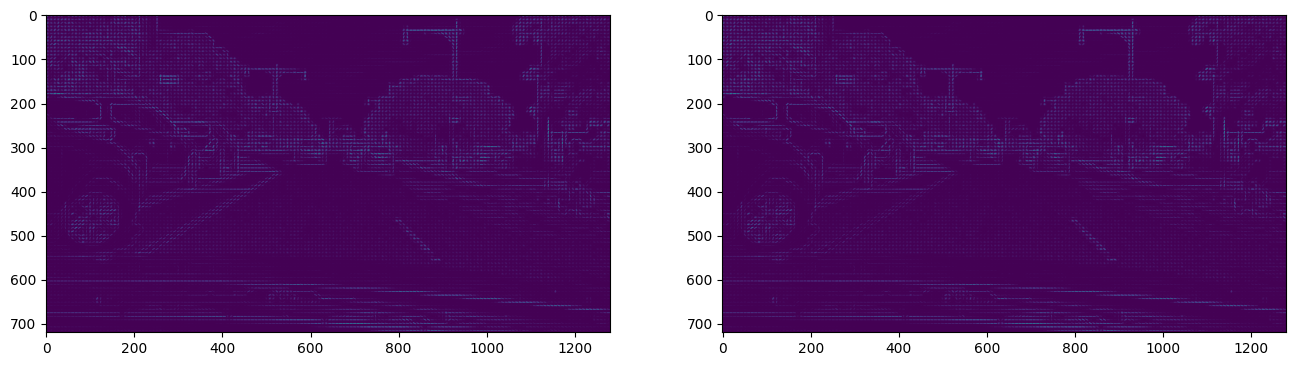

In [6]:
from skimage import feature

hog_features, hog_image =  feature.hog(
    frame,
    orientations = 9, 
    pixels_per_cell = (8, 8),
    cells_per_block = (2, 2),
    channel_axis = 2,
    visualize=True
)

gray_hog_features, gray_hog_image =  feature.hog(
    gray_frame,
    orientations = 9, 
    pixels_per_cell = (8, 8),
    cells_per_block = (2, 2),
    visualize=True
)

print(hog_features.shape)
print(gray_hog_features.shape)

plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)
plt.imshow(hog_image)

plt.subplot(1, 2, 2)
plt.imshow(gray_hog_image)

plt.show()